# 데이터 일교차 데이터 추가

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 파일 불러오기

temp_df = pd.read_csv('기상청_온도_일교차_2019_2024.csv', encoding='utf-8-sig')
sunlight_df = pd.read_csv('서울_일조일사_2019_2024.csv', encoding='utf-8-sig')
sunlight_df.head(), temp_df.head()

(   \t\t������ȣ ������         �Ͻ�  ������(hr)  ������(%)  �ϻ���(MJ/m2)
 0          108   ����  2019-01-01         7.5       78.1          7.84
 1          108   ����  2019-01-02         8.7       90.6         10.48
 2          108   ����  2019-01-03         8.7       89.7         10.28
 3          108   ����  2019-01-04         3.9       40.2          6.20
 4          108   ����  2019-01-05         8.6       88.7         10.05,
   \t\t������ȣ ������         �Ͻ�  ��ձ��(��)  �ְ����(��) \t�ְ���½ð�  \
 0     \t\t108   ����  2019-01-01       -5.0        -0.6      15:25   
 1     \t\t108   ����  2019-01-02       -4.9         0.2      14:58   
 2     \t\t108   ����  2019-01-03       -3.5         3.2      14:36   
 3     \t\t108   ����  2019-01-04       -1.1         4.1      15:04   
 4     \t\t108   ����  2019-01-05       -2.8         1.1      15:21   
 
    �������(��) ������½ð�  �ϱ���  
 0         -8.2      6:31    7.6  
 1         -8.8      8:02    9.0  
 2         -8.4      7:26   11.6  

In [19]:
columns1 = ['지점',	'지점명', '일시', '일조합(hr)', '일조율(%)', '일사합(MJ/m2)']
columns2 = ['지점',	'지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각',	'최저기온(℃)', '최저기온시각', '일교차']

sunlight_df.columns = columns1
temp_df.columns = columns2

In [27]:
sunlight_df = sunlight_df.drop(['지점', '지점명', '일사합(MJ/m2)'], axis=1)
temp_df = temp_df.drop(['지점', '지점명', '최고기온시각',	'최저기온(℃)', '최저기온시각', '일교차'], axis=1)

In [28]:
sunlight_df.head(1)

,일시,일조합(hr),일조율(%)
0,2019-01-01,7.5,78.1


In [29]:
temp_df.head(1)

,일시,평균기온(℃),최고기온(℃)
0,2019-01-01,-5.0,-0.6


In [30]:
df=pd.read_csv('cat_weather_dataset.csv', encoding='utf-8')
df

,Unnamed: 0,카테고리,time,강수량
0,0,이탈리아음식,2024-05-27,0.0
1,1,이탈리아음식,2024-07-05,4.1
2,2,이탈리아음식,2024-06-13,0.0
3,3,이탈리아음식,2024-06-19,0.0
4,4,이탈리아음식,2024-05-03,0.0
...,...,...,...,...
10809,10809,피자,2023-04-23,0.0
10810,10810,피자,2023-04-21,0.0
10811,10811,피자,2023-06-16,0.0
10812,10812,피자,2023-01-01,0.0


In [34]:
li1, li2=[], []

for i in df['time']:
    a=sunlight_df.loc[sunlight_df['일시']==i]
    li1.append(a['일조합(hr)'].values[0])
    li2.append(a['일조율(%)'].values[0])
df['일조합(hr)'] = li1
df['일조율(%)'] = li2
df.head()

,Unnamed: 0,카테고리,time,강수량,일조합(hr),일조율(%)
0,0,이탈리아음식,2024-05-27,0.0,9.9,68.3
1,1,이탈리아음식,2024-07-05,4.1,1.4,9.5
2,2,이탈리아음식,2024-06-13,0.0,13.3,90.5
3,3,이탈리아음식,2024-06-19,0.0,13.0,87.8
4,4,이탈리아음식,2024-05-03,0.0,12.8,92.8


In [35]:
li1, li2=[], []

for i in df['time']:
    a=temp_df.loc[temp_df['일시']==i]
    li1.append(a['평균기온(℃)'].values[0])
    li2.append(a['최고기온(℃)'].values[0])
df['평균기온(℃)'] = li1
df['최고기온(℃)'] = li2
df.head()

,Unnamed: 0,카테고리,time,강수량,일조합(hr),일조율(%),평균기온(℃),최고기온(℃)
0,0,이탈리아음식,2024-05-27,0.0,9.9,68.3,18.5,22.6
1,1,이탈리아음식,2024-07-05,4.1,1.4,9.5,23.4,26.1
2,2,이탈리아음식,2024-06-13,0.0,13.3,90.5,26.4,32.8
3,3,이탈리아음식,2024-06-19,0.0,13.0,87.8,28.8,35.8
4,4,이탈리아음식,2024-05-03,0.0,12.8,92.8,19.7,27.9


In [39]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(1)

,카테고리,time,강수량,일조합(hr),일조율(%),평균기온(℃),최고기온(℃)
0,이탈리아음식,2024-05-27,0.0,9.9,68.3,18.5,22.6


In [46]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
months[2:5] 

[3, 4, 5]

In [50]:
li = []

for i in df['time']:
    month = int(i.split('-')[1])
    if month in [3, 4, 5]:
        li.append('봄')
    elif month in [6, 7, 8]:
        li.append('여름')
    elif month in [9, 10, 11]:
        li.append('가을')
    else:
        li.append('겨울')

li


['봄',
 '여름',
 '여름',
 '여름',
 '봄',
 '봄',
 '여름',
 '봄',
 '여름',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '여름',
 '봄',
 '여름',
 '봄',
 '봄',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '겨울',
 '여름',
 '봄',
 '봄',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '겨울',
 '여름',
 '봄',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '여름',
 '겨울',
 '봄',
 '여름',
 '봄',
 '봄',
 '겨울',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '여름',
 '겨울',
 '봄',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '봄',
 '여름',
 '여름',
 '봄',
 '겨울',
 '봄',
 '봄',
 '겨울',
 '봄',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '봄',
 '겨울',
 '봄',
 '여름',
 '봄',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '여름',
 '여름',
 '봄',
 '여름',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '여름',
 '여름',
 '여름',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '여름',
 '여름',
 '봄',
 '봄',
 '여름',
 '여름',
 '봄',
 '봄',
 '여름',
 '봄',
 '봄',
 '봄',


In [52]:
df['계절'] = li

In [54]:
df

,카테고리,time,강수량,일조합(hr),일조율(%),평균기온(℃),최고기온(℃),계절
0,이탈리아음식,2024-05-27,0.0,9.9,68.3,18.5,22.6,봄
1,이탈리아음식,2024-07-05,4.1,1.4,9.5,23.4,26.1,여름
2,이탈리아음식,2024-06-13,0.0,13.3,90.5,26.4,32.8,여름
3,이탈리아음식,2024-06-19,0.0,13.0,87.8,28.8,35.8,여름
4,이탈리아음식,2024-05-03,0.0,12.8,92.8,19.7,27.9,봄
...,...,...,...,...,...,...,...,...
10809,피자,2023-04-23,0.0,4.4,32.8,16.1,22.1,봄
10810,피자,2023-04-21,0.0,7.8,58.2,16.7,22.8,봄
10811,피자,2023-06-16,0.0,12.5,84.5,23.7,28.9,여름
10812,피자,2023-01-01,0.0,9.0,93.8,-0.2,3.8,겨울


In [60]:
df['계절'].value_counts().values

array([3926, 3573, 2172, 1143], dtype=int64)

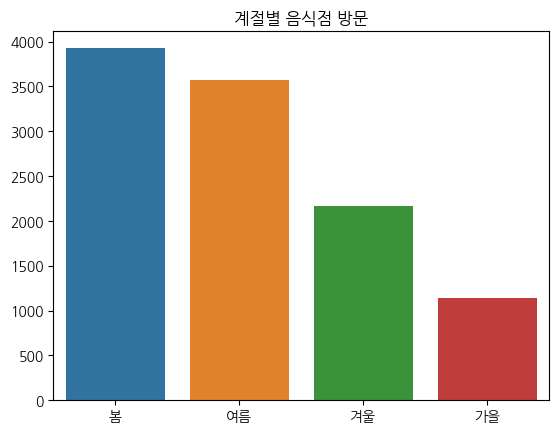

In [63]:
import koreanize_matplotlib
sns.barplot(x=df['계절'].unique(), y=df['계절'].value_counts().values, hue=df['계절'].unique())
plt.title('계절별 음식점 방문')
plt.show()

In [73]:
df.isnull().sum()

카테고리        0
time        0
강수량         0
일조합(hr)    64
일조율(%)     25
평균기온(℃)     0
최고기온(℃)     0
계절          0
dtype: int64

In [74]:
df['일조율(%)'] = df['일조율(%)'].fillna(df['일조율(%)'].mean())
df['일조합(hr)'] = df['일조합(hr)'].fillna(df['일조합(hr)'].mean())
df.isnull().sum()

카테고리       0
time       0
강수량        0
일조합(hr)    0
일조율(%)     0
평균기온(℃)    0
최고기온(℃)    0
계절         0
dtype: int64

In [75]:
df.to_csv('음식추천데이터.csv', encoding='utf-8-sig')

In [77]:
df['일조율(%)'].min()

0.0